  #                                       Steepest Ascent Method

In [1]:
# Optimal gradient steepest Ascent method

from sympy import *
import numpy as np
import time 

start = time.time()


def func(x, y): 
    return 4*x*y - x**4 - y**4 + 4

#partial derivative wrt x  
def dx(x,y): 
    dx = 4*x - 4*y**3 
    return dx

# partial derivative wrt y
def dy(x, y):
    dy = 4*x - 4*y**3 
    return dy


h = Symbol('h', real = True)

x = 2
y = 3

# Partial derivative wrt x = 4*x - 4*y**3 

# Partial derivative wrt y = 4*x - 4*y**3 
	
d2x = 12*x**2 # Second derivative wrt x
d2y = 12*y**2 # Second derivative wrt y

dxdy = 4 # Second derivative wrt yx

# The values (analytical solution) of the first derivatives set equal to zero
# x = 1.6 and y = 1

sx = 1.6
sy = 1

In [2]:
def errx(x, y):
    errx = (sx - x)/sx
    return abs(errx)

def erry(x, y):
    erry = (sy - y)/sy
    return abs(erry)

alpha = 0.0001

def gradientAscent(x, y):
    i = 0
    while(errx(x,y) >= alpha and erry(x,y) >= alpha):
        gradx, grady = x + dx(x, y)*h, y + dy(x, y)*h
        g = func(gradx, grady)
        dg = g.diff(h)
        d = solve(dg, h)
        e = np.array(d)
        m = e[-1]
        x = x + dx(x, y)*m
        y = y + dy(x, y)*m
        i = i + 1
    print("The number of iterations is: ", i)
    return(x, y)

In [3]:
hessian = d2x*d2y - dxdy**2
if(hessian > 0 and d2x > 0):
	print("The function f(x, y) has a local minimum")
	print("The Hessian is: ", hessian)
elif(hessian > 0 and d2x < 0):
	print("The function f(x, y) has a local maximum")
	print("The Hessian is: ", hessian)
else:
	print("The function f(x, y) has a saddle point")
	print("The Hessian is: ", hessian)
    
end = time.time()

The function f(x, y) has a local minimum
The Hessian is:  5168


In [4]:
print("The execution time is: ", end - start)

print("The value of f(x, y) at the approximate minimum is: ", func(x, y))
print("The value of f(x, y) at the exact minimum is: ", func(sx, sy))

print("The difference between the approximate and exact minimum is: ")
print(func(sx, sy) - func(x, y))
print("The percent error between the approximate and exact minimum is: ")
print(((func(sx, sy) - func(x, y))/func(sx, sy))*100, "%")

The execution time is:  0.3702397346496582
The value of f(x, y) at the approximate minimum is:  -69
The value of f(x, y) at the exact minimum is:  2.846399999999999
The difference between the approximate and exact minimum is: 
71.8464
The percent error between the approximate and exact minimum is: 
2524.114671163576 %


Text(0.5, 0, 'z')

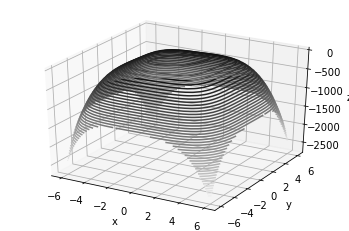

In [5]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')